In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import psycopg2

### Extract CSVs into DataFrames

In [48]:
GDP_file = "Resources/GDP.csv"
GDP_df = pd.read_csv(GDP_file)
GDP_df

,SDG_IND,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
0,XGDP_FSGOV,Government expenditure on education as a perce...,CHL,Chile,2015,2015,4.87531,NaN,NaN
1,XGDP_FSGOV,Government expenditure on education as a perce...,CHL,Chile,2016,2016,5.34201,NaN,NaN
2,XGDP_FSGOV,Government expenditure on education as a perce...,CHL,Chile,2017,2017,5.41966,NaN,NaN
3,XGDP_FSGOV,Government expenditure on education as a perce...,CHL,Chile,2018,2018,5.43317,NaN,NaN
4,XGDP_FSGOV,Government expenditure on education as a perce...,IND,India,2015,2015,3.28573,NaN,NaN
...,...,...,...,...,...,...,...,...,...
763,XGDP_FSGOV,Government expenditure on education as a perce...,SUR,Suriname,2015,2015,5.92651,+,National Estimation
764,XGDP_FSGOV,Government expenditure on education as a perce...,SUR,Suriname,2016,2016,5.98030,+,National Estimation
765,XGDP_FSGOV,Government expenditure on education as a perce...,SUR,Suriname,2017,2017,6.10751,+,National Estimation
766,XGDP_FSGOV,Government expenditure on education as a perce...,SUR,Suriname,2018,2018,5.68860,+,National Estimation


### Transform GDP DataFrame

In [49]:
GDP_df = GDP_df[['SDG_IND','Indicator','Country','Time','Value']]
GDP_df=GDP_df.rename(columns={'Country':'country','SDG_IND':'sdg_ind', 'Indicator':'indicator','Time':'year','Value':'edu_percent'})
#GDP_df = GDP_df.set_index('country')
GDP_df

,sdg_ind,indicator,country,year,edu_percent
0,XGDP_FSGOV,Government expenditure on education as a perce...,Chile,2015,4.87531
1,XGDP_FSGOV,Government expenditure on education as a perce...,Chile,2016,5.34201
2,XGDP_FSGOV,Government expenditure on education as a perce...,Chile,2017,5.41966
3,XGDP_FSGOV,Government expenditure on education as a perce...,Chile,2018,5.43317
4,XGDP_FSGOV,Government expenditure on education as a perce...,India,2015,3.28573
...,...,...,...,...,...
763,XGDP_FSGOV,Government expenditure on education as a perce...,Suriname,2015,5.92651
764,XGDP_FSGOV,Government expenditure on education as a perce...,Suriname,2016,5.98030
765,XGDP_FSGOV,Government expenditure on education as a perce...,Suriname,2017,6.10751
766,XGDP_FSGOV,Government expenditure on education as a perce...,Suriname,2018,5.68860


In [50]:
GDP_df.index

RangeIndex(start=0, stop=768, step=1)

In [51]:
GDP_clean_df = GDP_df.loc[GDP_df["year"] <2016]
GDP_clean_df

,sdg_ind,indicator,country,year,edu_percent
0,XGDP_FSGOV,Government expenditure on education as a perce...,Chile,2015,4.87531
4,XGDP_FSGOV,Government expenditure on education as a perce...,India,2015,3.28573
6,XGDP_FSGOV,Government expenditure on education as a perce...,Malawi,2015,5.60866
12,XGDP_FSGOV,Government expenditure on education as a perce...,Togo,2015,5.10860
17,XGDP_FSGOV,Government expenditure on education as a perce...,Portugal,2015,4.88554
...,...,...,...,...,...
735,XGDP_FSGOV,Government expenditure on education as a perce...,Italy,2015,4.07363
750,XGDP_FSGOV,Government expenditure on education as a perce...,Bahamas,2015,2.28832
756,XGDP_FSGOV,Government expenditure on education as a perce...,Faeroe Islands,2015,7.71242
759,XGDP_FSGOV,Government expenditure on education as a perce...,Greenland,2015,12.00460


In [52]:
GDP_clean_df.dtypes

sdg_ind         object
indicator       object
country         object
year             int64
edu_percent    float64
dtype: object

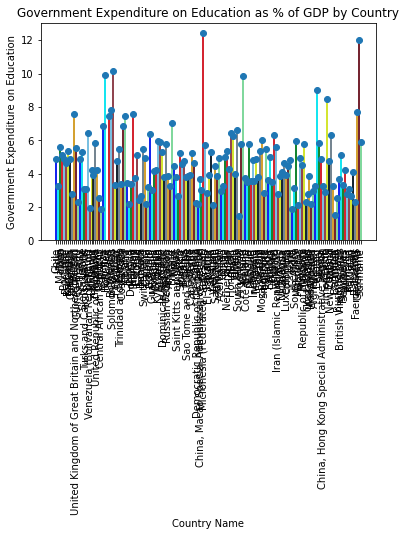

In [5]:
# # using subplots() to draw vertical lines
fig, axes = plt.subplots()
axes.vlines(GDP_clean_df.index, ymin=0, ymax= GDP_clean_df['edu_percent'])
  
# # drawing the markers (circle)
axes.plot(GDP_clean_df.index, GDP_clean_df['edu_percent'], "o")
axes.set_ylim(0)


line_colors = ['blue', 'cyan', 'green', 'red',
                'skyblue', 'brown', 'yellow',
                'black', 'grey', 'orange', 'maroon',
                'lightgreen']
  
axes.vlines(GDP_clean_df.index, ymin=0,
             ymax=GDP_clean_df['edu_percent'], colors=line_colors)


# # formatting and details
plt.xlabel('Country Name')
plt.ylabel('Government Expenditure on Education')
plt.title('Government Expenditure on Education as % of GDP by Country')
plt.xticks(GDP_clean_df.index)
plt.xticks(rotation=90)
plt.show()

In [6]:
GERD_file = "Resources/GERD.csv"
GERD_df = pd.read_csv(GERD_file)
GERD_df

,INDICATOR,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
0,20600,GERD - Total (in '000 local currency),AUS,Australia,2013,2013,3.347150e+07,NaN,NaN
1,20600,GERD - Total (in '000 local currency),AUS,Australia,2015,2015,3.117900e+07,NaN,NaN
2,20600,GERD - Total (in '000 local currency),AUS,Australia,2017,2017,3.306200e+07,NaN,NaN
3,20600,GERD - Total (in '000 local currency),AUT,Austria,2013,2013,9.571282e+06,NaN,NaN
4,20600,GERD - Total (in '000 local currency),AUT,Austria,2014,2014,1.027518e+07,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6527,EXPGDP_TOT,GERD as a percentage of GDP,MRT,Mauritania,2018,2018,1.081000e-02,NaN,NaN
6528,EXPCAPPPP_CUR,GERD per capita (in current PPP$),MRT,Mauritania,2018,2018,5.577300e-01,NaN,NaN
6529,EXPPPP_CUR,GERD in '000 current PPP$,MRT,Mauritania,2018,2018,2.455848e+03,NaN,NaN
6530,EXPPPP_CONST,GERD in '000 PPP$ (in constant prices - 2005),MRT,Mauritania,2018,2018,1.929943e+03,NaN,NaN


### Transform GERD DataFrame

In [7]:
# Create a filtered dataframe from specific columns

GERD_df = GERD_df[['INDICATOR','Indicator','Country','Time','Value']]
GERD_df=GERD_df.rename(columns={'Country':'country','INDICATOR':'gerd_ind', 'Indicator':'indicator','Time':'year','Value':'gerd_percent'})
GERD_df = GERD_df.set_index('country')
GERD_df=GERD_df.loc[GERD_df['gerd_ind']== 'EXPGDP_TOT']
GERD_df

,gerd_ind,indicator,year,gerd_percent
country,,,,
Australia,EXPGDP_TOT,GERD as a percentage of GDP,2013,2.17870
Australia,EXPGDP_TOT,GERD as a percentage of GDP,2015,1.91918
Australia,EXPGDP_TOT,GERD as a percentage of GDP,2017,1.87466
Austria,EXPGDP_TOT,GERD as a percentage of GDP,2013,2.95492
Austria,EXPGDP_TOT,GERD as a percentage of GDP,2014,3.08429
...,...,...,...,...
Eswatini,EXPGDP_TOT,GERD as a percentage of GDP,2015,0.26661
Syrian Arab Republic,EXPGDP_TOT,GERD as a percentage of GDP,2015,0.02053
Côte d'Ivoire,EXPGDP_TOT,GERD as a percentage of GDP,2016,0.07040


In [8]:
dates = [2013, 2014, 2016, 2017, 2018, 2019]
GERD_clean_df=GERD_df[GERD_df.year.isin(dates) == False]
GERD_clean_df

,gerd_ind,indicator,year,gerd_percent
country,,,,
Australia,EXPGDP_TOT,GERD as a percentage of GDP,2015,1.91918
Austria,EXPGDP_TOT,GERD as a percentage of GDP,2015,3.04969
Belgium,EXPGDP_TOT,GERD as a percentage of GDP,2015,2.42817
Canada,EXPGDP_TOT,GERD as a percentage of GDP,2015,1.69324
Czechia,EXPGDP_TOT,GERD as a percentage of GDP,2015,1.92923
...,...,...,...,...
Asia (South-eastern),EXPGDP_TOT,GERD as a percentage of GDP,2015,0.87510
Asia (Western),EXPGDP_TOT,GERD as a percentage of GDP,2015,0.81803
Europe,EXPGDP_TOT,GERD as a percentage of GDP,2015,1.84086


In [9]:
TotalRD_file = "R_D_Total.csv"
TotalRD_df = pd.read_csv(TotalRD_file,header=1)
TotalRD_df=TotalRD_df.rename(columns={"Country":'country','Time ':'year', 'Value':'number_per_thousand'})
TotalRD_df = TotalRD_df.set_index('country')
TotalRD_df.fillna(0)
TotalRD_df['number_per_thousand'] = TotalRD_df['number_per_thousand'].replace("..", "0")
TotalRD_df

,year,number_per_thousand
country,,
Algeria,2017,8.34905
Angola,2016,0.18168
Argentina,2015,5.5933
Argentina,2016,5.73809
Argentina,2017,5.55853
...,...,...
United Arab Emirates,2016,20.37984
Uruguay,2015,2.56995
Uruguay,2016,2.53343


In [10]:
dates = [2013, 2014, 2016, 2017, 2018, 2019]
TotalRD_Clean_df=TotalRD_df[TotalRD_df.year.isin(dates) == False]
TotalRD_Clean_df


,year,number_per_thousand
country,,
Argentina,2015,5.5933
Armenia,2015,3.77812
Austria,2015,28.16698
Azerbaijan,2015,4.75049
Belarus,2015,5.14577
...,...,...
Uganda,2015,5.11131
Ukraine,2015,2.1641
United Arab Emirates,2015,19.78304


In [20]:
TotalRD_Clean_df.dtypes


year                    int64
number_per_thousand    object
dtype: object

### Create database connection

In [55]:
connection_string = "postgres:@localhost:5432/unesco_db"
engine = create_engine(f'postgresql://{connection_string}')

In [56]:
# Confirm tables
engine.table_names()

/var/folders/6x/83dn3sr912jd1wjj53dxy4140000gn/T/ipykernel_9521/3015872754.py:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['gerd', 'rd', 'edu']

### Load DataFrames into database

In [58]:
GDP_clean_df.to_sql(name='edu', con=engine, if_exists='append', index=True)

In [18]:
GERD_clean_df.to_sql(name='gerd', con=engine, if_exists='append', index=True)

IntegrityError: (psycopg2.errors.UniqueViolation) duplicate key value violates unique constraint "gerd_pkey"
DETAIL:  Key (country)=(Latin America and the Caribbean) already exists.

[SQL: INSERT INTO gerd (country, gerd_ind, indicator, year, gerd_percent) VALUES (%(country)s, %(gerd_ind)s, %(indicator)s, %(year)s, %(gerd_percent)s)]
[parameters: ({'country': 'Australia', 'gerd_ind': 'EXPGDP_TOT', 'indicator': 'GERD as a percentage of GDP', 'year': 2015, 'gerd_percent': 1.91918}, {'country': 'Austria', 'gerd_ind': 'EXPGDP_TOT', 'indicator': 'GERD as a percentage of GDP', 'year': 2015, 'gerd_percent': 3.04969}, {'country': 'Belgium', 'gerd_ind': 'EXPGDP_TOT', 'indicator': 'GERD as a percentage of GDP', 'year': 2015, 'gerd_percent': 2.42817}, {'country': 'Canada', 'gerd_ind': 'EXPGDP_TOT', 'indicator': 'GERD as a percentage of GDP', 'year': 2015, 'gerd_percent': 1.69324}, {'country': 'Czechia', 'gerd_ind': 'EXPGDP_TOT', 'indicator': 'GERD as a percentage of GDP', 'year': 2015, 'gerd_percent': 1.92923}, {'country': 'Denmark', 'gerd_ind': 'EXPGDP_TOT', 'indicator': 'GERD as a percentage of GDP', 'year': 2015, 'gerd_percent': 3.05497}, {'country': 'Finland', 'gerd_ind': 'EXPGDP_TOT', 'indicator': 'GERD as a percentage of GDP', 'year': 2015, 'gerd_percent': 2.87196}, {'country': 'France', 'gerd_ind': 'EXPGDP_TOT', 'indicator': 'GERD as a percentage of GDP', 'year': 2015, 'gerd_percent': 2.26703}  ... displaying 10 of 136 total bound parameter sets ...  {'country': 'Eswatini', 'gerd_ind': 'EXPGDP_TOT', 'indicator': 'GERD as a percentage of GDP', 'year': 2015, 'gerd_percent': 0.26661}, {'country': 'Syrian Arab Republic', 'gerd_ind': 'EXPGDP_TOT', 'indicator': 'GERD as a percentage of GDP', 'year': 2015, 'gerd_percent': 0.02053})]
(Background on this error at: https://sqlalche.me/e/14/gkpj)

In [24]:
TotalRD_Clean_df.to_sql(name='rd', con=engine, if_exists='append', index=True)

IntegrityError: (psycopg2.errors.UniqueViolation) duplicate key value violates unique constraint "rd_pkey"
DETAIL:  Key (country)=(Argentina) already exists.

[SQL: INSERT INTO rd (country, year, number_per_thousand) VALUES (%(country)s, %(year)s, %(number_per_thousand)s)]
[parameters: ({'country': 'Argentina', 'year': 2015, 'number_per_thousand': '5.5933'}, {'country': 'Armenia', 'year': 2015, 'number_per_thousand': '3.77812'}, {'country': 'Austria', 'year': 2015, 'number_per_thousand': '28.16698'}, {'country': 'Azerbaijan', 'year': 2015, 'number_per_thousand': '4.75049'}, {'country': 'Belarus', 'year': 2015, 'number_per_thousand': '5.14577'}, {'country': 'Belgium', 'year': 2015, 'number_per_thousand': '22.70253'}, {'country': 'Bosnia and Herzegovina', 'year': 2015, 'number_per_thousand': '2.26521'}, {'country': 'Brazil', 'year': 2015, 'number_per_thousand': '6.30509'}  ... displaying 10 of 115 total bound parameter sets ...  {'country': 'Uruguay', 'year': 2015, 'number_per_thousand': '2.56995'}, {'country': 'Venezuela (Bolivarian Republic of)', 'year': 2015, 'number_per_thousand': '3.00835'})]
(Background on this error at: https://sqlalche.me/e/14/gkpj)